## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns  

## Loading the CSV file

In [26]:
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\PYTHON FILES\Deep_Learning\Assignments & Projects\Assignment 4\Multiple CSV\6.overlap.csv",header=None) 
df.head() 

,0,1,2
0,7.0,3.2,0
1,6.4,3.2,0
2,6.9,3.1,0
3,5.5,2.3,0
4,6.5,2.8,0


In [27]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [28]:
# Checking whether target variable is imbalanced or not
df[2].value_counts()   

0    50
1    50
Name: 2, dtype: int64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0'>

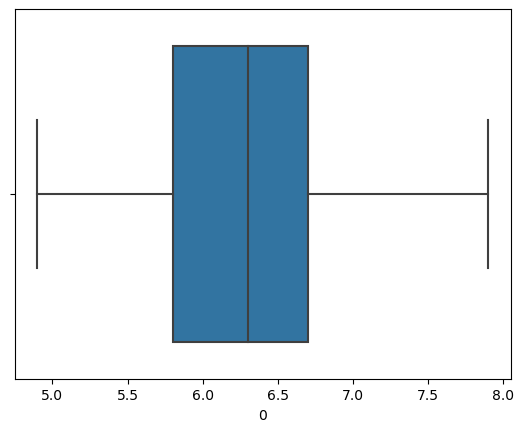

In [29]:
## Identifying outliers 
sns.boxplot(df[0])  

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1'>

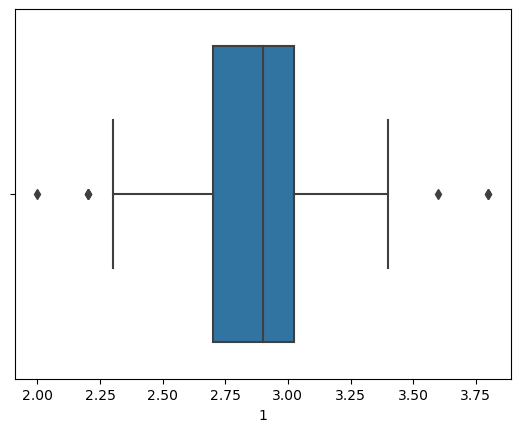

In [30]:
sns.boxplot(df[1]) 

In [31]:
# removing the outliers
df=df[(df[1]<3.50)&(df[1]>2.25)]  

In [32]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       93 non-null     float64
 1   1       93 non-null     float64
 2   2       93 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1'>

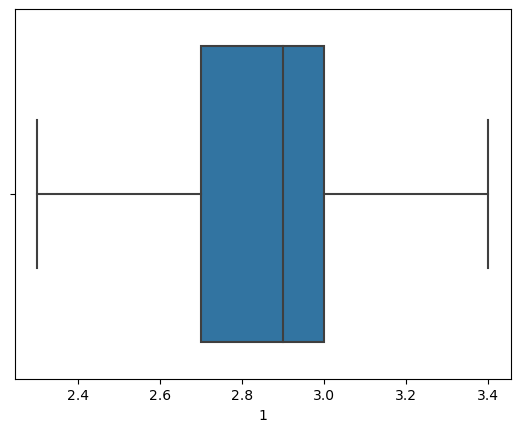

In [33]:
sns.boxplot(df[1])  

## Identifying the Input and Output Features

In [91]:
x=df.iloc[:,0:2]
y=df.iloc[:,2]  

## Spliting the data into train and test

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1) 

## Standardizing input features 

In [93]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test) 

## Building the Logical Structure 

In [94]:
from keras import Sequential 
from keras.layers import Dense, BatchNormalization 
from keras.regularizers import L1,L2,L1L2 
from keras.optimizers import SGD  

In [95]:
model=Sequential()
model.add(Dense(20,activation="relu",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01),input_dim=2))
model.add(Dense(16,activation="relu",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01)))
model.add(BatchNormalization())
model.add(Dense(10,activation="relu",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01)))
model.add(Dense(1,activation="sigmoid")) 

In [96]:
model.summary() 

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 20)                60        
                                                                 
 dense_41 (Dense)            (None, 16)                336       
                                                                 
 batch_normalization_10 (Ba  (None, 16)                64        
 tchNormalization)                                               
                                                                 
 dense_42 (Dense)            (None, 10)                170       
                                                                 
 dense_43 (Dense)            (None, 1)                 11        
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 609 (2.38 KB)
Non-trainable params: 32 (128.00 Byte)
____________________

## compiling the model

In [97]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(x_train,y_train,batch_size=15,epochs=25,validation_split=0.1) 

Epoch 1/25
5/5 [==============================] - 2s 135ms/step - loss: 1.1020 - accuracy: 0.4595 - val_loss: 0.9693 - val_accuracy: 0.7778
Epoch 2/25
5/5 [==============================] - 0s 28ms/step - loss: 1.0108 - accuracy: 0.6757 - val_loss: 0.9645 - val_accuracy: 0.6667
Epoch 3/25
5/5 [==============================] - 0s 23ms/step - loss: 1.0160 - accuracy: 0.6351 - val_loss: 0.9586 - val_accuracy: 0.6667
Epoch 4/25
5/5 [==============================] - 0s 23ms/step - loss: 0.9835 - accuracy: 0.6757 - val_loss: 0.9543 - val_accuracy: 0.6667
Epoch 5/25
5/5 [==============================] - 0s 26ms/step - loss: 0.9882 - accuracy: 0.6351 - val_loss: 0.9546 - val_accuracy: 0.6667
Epoch 6/25
5/5 [==============================] - 0s 26ms/step - loss: 0.9725 - accuracy: 0.7297 - val_loss: 0.9521 - val_accuracy: 0.6667
Epoch 7/25
5/5 [==============================] - 0s 22ms/step - loss: 0.9556 - accuracy: 0.6892 - val_loss: 0.9478 - val_accuracy: 0.7778
Epoch 8/25
5/5 [==========

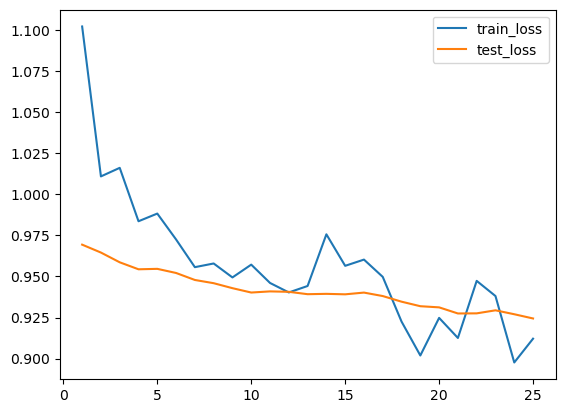

In [98]:
plt.plot(range(1,26),history.history["loss"],label="train_loss")
plt.plot(range(1,26),history.history["val_loss"],label="test_loss") 
plt.legend()  

## Predicting the model 

In [99]:
predicted=model.predict(x_test) 
predicted  

1/1 [==============================] - 0s 220ms/step


array([[0.5250007 ],
       [0.5207872 ],
       [0.80914325],
       [0.4554779 ],
       [0.6749395 ],
       [0.42009902],
       [0.44996282],
       [0.43591765],
       [0.41506186],
       [0.48679525]], dtype=float32)

In [100]:
predicted=np.where(predicted>0.5,1,0)
predicted  

array([[1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

## Evaluating the model

In [101]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
 

0.7


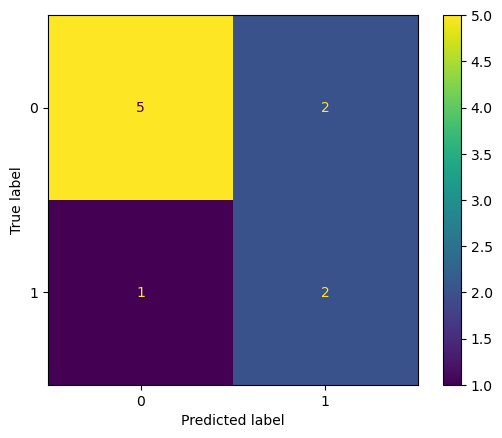

In [102]:
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show()

## PLOTING THE DECISION SURFACE

In [103]:
from mlxtend.plotting  import plot_decision_regions 

9600/9600 [==============================] - 28s 3ms/step


<AxesSubplot:>

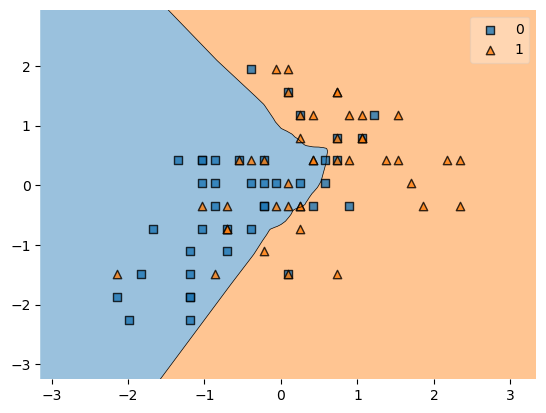

In [104]:
plot_decision_regions(x_train,y_train.values,clf=model)  

9600/9600 [==============================] - 25s 3ms/step


<AxesSubplot:>

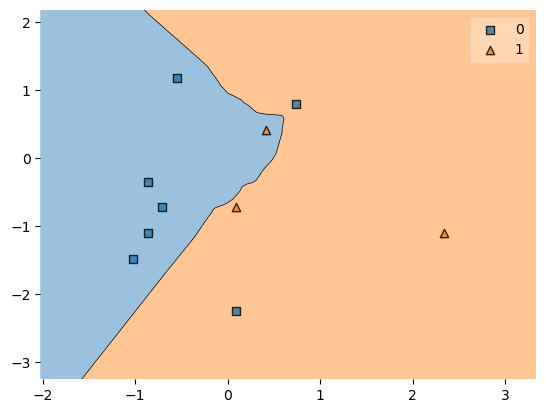

In [105]:
plot_decision_regions(x_test,y_test.values,clf=model)

## Conclusions:

###### This neural network model achieves an accuracy of 70%. 

- The model architecture consists of 3 hidden layers with the following specifications:

- In the first hidden layer, there are 20 neurons with the relu activation function
- In the second hidden layer, there are 16 neurons with the relu activation function
- In the third hidden layer, there are 10 neurons with the relu activation function 
- The output layer uses the sigmoid activation function.

###### Overall, this neural network model architecture and training configuration achieve an accuracy of 70%.   